In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [40]:
df = pd.read_excel("/content/advertising_sales_data.xlsx")

In [41]:
print(df.head())

  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9


In [42]:
print(df.columns)

Index(['Campaign', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [43]:
print(df['TV'].isnull().sum())

0


In [44]:
print(df['Radio'].isnull().sum())

2


In [45]:
print(df['Newspaper'].isnull().sum())

0


In [46]:
print(df['Sales'].isnull().sum())

0


In [47]:
print(df['Radio'].describe())

count    198.000000
mean      23.260606
std       14.921914
min        0.000000
25%        9.925000
50%       22.400000
75%       36.575000
max       49.600000
Name: Radio, dtype: float64


In [48]:
print(df['Campaign'].count())

200


In [49]:
print(df.count())

Campaign     200
TV           200
Radio        198
Newspaper    200
Sales        200
dtype: int64


#question1 : average amount spent on TV?


In [50]:
print(df['TV'].describe())

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64


In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df.iloc[:,1:4])
df.iloc[:,1:4] = imputer.transform(df.iloc[:,1:4])
print(df.count())

Campaign     200
TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64


#question2: Correlation between Radio and Sales?

          Radio     Sales
Radio  1.000000  0.349593
Sales  0.349593  1.000000


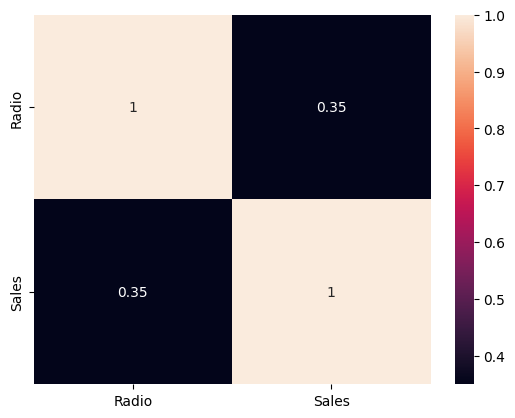

In [52]:
corr_matrix = df[['Radio','Sales']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

#Question3: Advertising Medium having highest impact on Sales

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054627   0.056648  0.901208
Radio      0.054627  1.000000   0.354595  0.349593
Newspaper  0.056648  0.354595   1.000000  0.157960
Sales      0.901208  0.349593   0.157960  1.000000


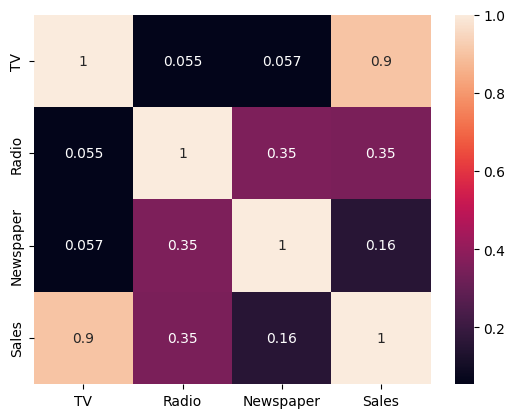

In [53]:
corr_matrix = df[['TV','Radio','Newspaper','Sales']].corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [54]:
X = df.iloc[:,range(1,4)].values
y = df.iloc[:,-1].values

In [55]:
print(X[0:3])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]]


In [56]:
from sklearn.model_selection import train_test_split
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_original)
X_test = sc.transform(X_test_original)
print(X_train[0:3])
print(X_test[0:3])
print(len(X_train))
print(len(y_train))

[[-1.4786142  -1.5063965  -0.20709647]
 [-0.59391209 -1.51297843 -0.32129096]
 [-1.41452194 -0.73631151 -0.31177475]]
[[ 0.78407154  1.73190964  0.36863409]
 [ 0.68907765 -0.06495535  0.07838976]
 [-0.53325334 -1.44057727 -1.07307135]]
160
160


In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred = regressor.predict(X_test)


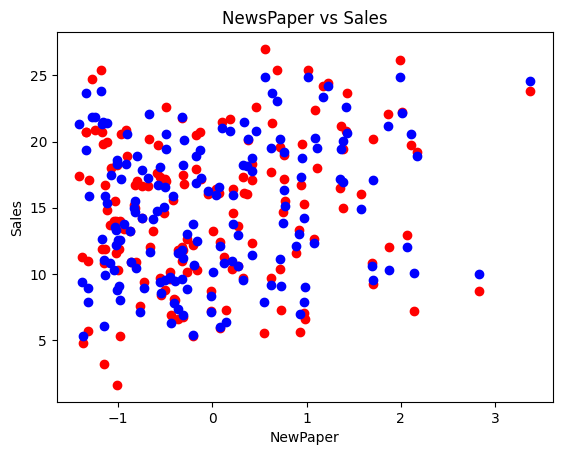

In [60]:
plt.scatter(X_train[:,2], y_train, color = 'red')

plt.scatter(X_train[:,2], regressor.predict(X_train), color = 'blue')
plt.title('NewsPaper vs Sales')
plt.xlabel('NewPaper')
plt.ylabel('Sales')

plt.show()

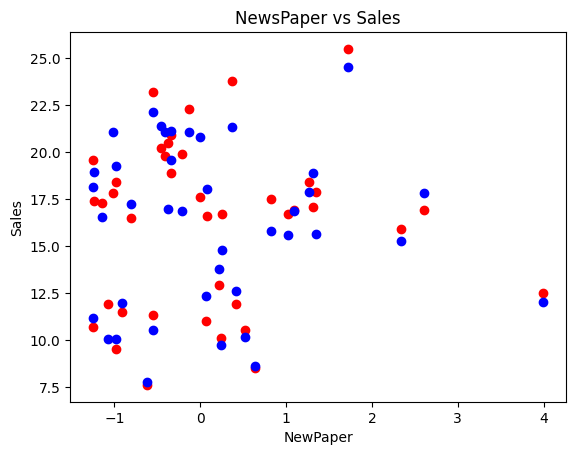

In [61]:
plt.scatter(X_test[:,2], y_test, color = 'red')

plt.scatter(X_test[:,2], regressor.predict(X_test), color = 'blue')
plt.title('NewsPaper vs Sales')
plt.xlabel('NewPaper')
plt.ylabel('Sales')
plt.show()

#Prediction for $200 on TV, $40 on Radio, and $50 on Newspaper?

In [63]:
arr = [[200,40,50]]
arr = np.array(arr)
scaled_arr = sc.transform(arr)
out = regressor.predict(scaled_arr)
print(out[0])


19.73359364355751


#6.	How does the performance of the linear regression model change when the dataset is normalized?

In [66]:
#CALCULATING LOSS FUNCTION(STANDARD SCALER)
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

4.6160968676126295


In [71]:
#CALCULATIONS USING NORMALISED VALUES
X_train = (X_train_original - X_train_original.min())/X_train_original.std()
X_test = (X_test_original - X_test_original.min())/X_test_original.std()
# print(X_train[0:3])
# print(X_test[0:3])
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

3.2087301961889514


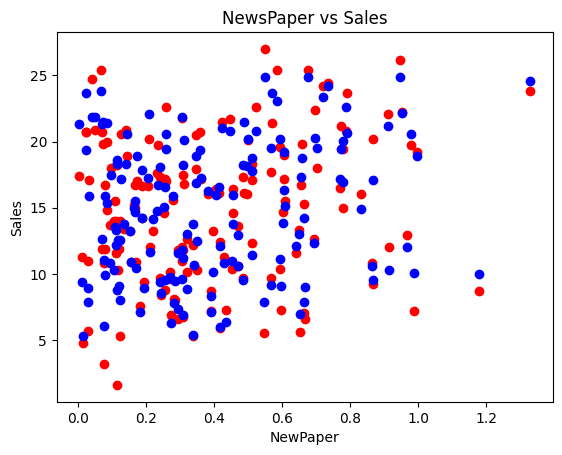

In [72]:
plt.scatter(X_train[:,2], y_train, color = 'red')

plt.scatter(X_train[:,2], regressor.predict(X_train), color = 'blue')
plt.title('NewsPaper vs Sales')
plt.xlabel('NewPaper')
plt.ylabel('Sales')

plt.show()

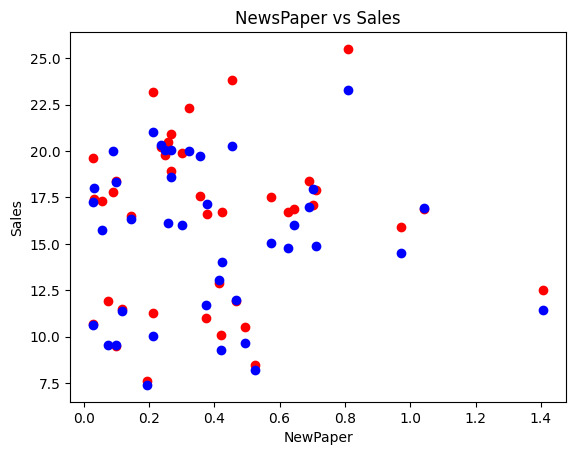

In [73]:
plt.scatter(X_test[:,2], y_test, color = 'red')

plt.scatter(X_test[:,2], regressor.predict(X_test), color = 'blue')
plt.title('NewsPaper vs Sales')
plt.xlabel('NewPaper')
plt.ylabel('Sales')

plt.show()

In [77]:
X = df.iloc[:,range(2,4)]
y = df.iloc[:,-1]
print(X[0:3])
print(y[0:3])

   Radio  Newspaper
0   37.8       69.2
1   39.3       45.1
2   45.9       69.3
0    22.1
1    10.4
2    12.0
Name: Sales, dtype: float64


In [78]:
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train_original)
X_test = sc.transform(X_test_original)
print(X_train[0:3])
print(X_test[0:3])
print(len(X_train))
print(len(y_train))

[[-1.5063965  -0.20709647]
 [-1.51297843 -0.32129096]
 [-0.73631151 -0.31177475]]
[[ 1.73190964  0.36863409]
 [-0.06495535  0.07838976]
 [-1.44057727 -1.07307135]]
160
160


# Impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors

In [79]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

19.078629757528823


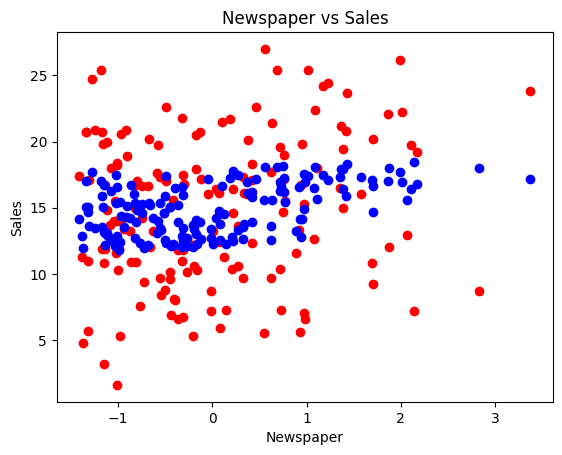

In [82]:
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.scatter(X_train[:,1], regressor.predict(X_train), color = 'blue')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

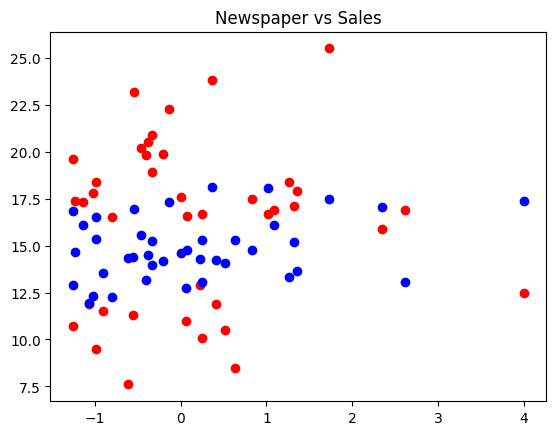

In [83]:
plt.scatter(X_test[:,1], y_test, color = 'red')

plt.scatter(X_test[:,1], regressor.predict(X_test), color = 'blue')
plt.title('Newspaper vs Sales')
plt